In [1]:
import sys
sys.path.append("/users/munozr/mycodes")
import numpy as np
import matplotlib.pyplot as plt
from data_analysis_codes.tools import Cstyle
plt.style.use(Cstyle.style1)
from data_analysis_codes.tools import ReadingTools as RRead
from data_analysis_codes.tools import LinData
import pandas as pd
from data_analysis_codes.tools import NumMethods

In [2]:
param = RRead.read_parameters('pflrw_d3e2_L1206_t1_N128_EdS')
Lin = LinData.LinData_Class(param)
fA = pd.read_table(param['datapath']+'h5_data.csv', delimiter=',')

 read time file


In [3]:
param_mK = RRead.read_parameters('pflrw_d3e2_L1206_t1_N32_EdS_CLPT_mKPunc')
f_mK = pd.read_table(param_mK['datapath']+'h5_data.csv', delimiter=',')
fc_mK = pd.read_table(param_mK['datapath']+'constraints.csv', delimiter=',')

In [4]:
param_mKP = RRead.read_parameters('pflrw_d3e2_L1206_t1_N32_EdS_GRH_mKPunc')
f_mKP = pd.read_table(param_mKP['datapath']+'h5_data.csv', delimiter=',')
fc_mKP = pd.read_table(param_mK['datapath']+'constraints.csv', delimiter=',')

In [5]:
param_CTDP10 = RRead.read_parameters('pflrw_d3e2_L1206_t1_N32_EdS_CLPT_mKPunc_10driver')
f_mK10 = pd.read_table(param_CTDP10['datapath']+'h5_data.csv', delimiter=',')
fc_mK10 = pd.read_table(param_CTDP10['datapath']+'constraints.csv', delimiter=',')

No handles with labels found to put in legend.
No handles with labels found to put in legend.


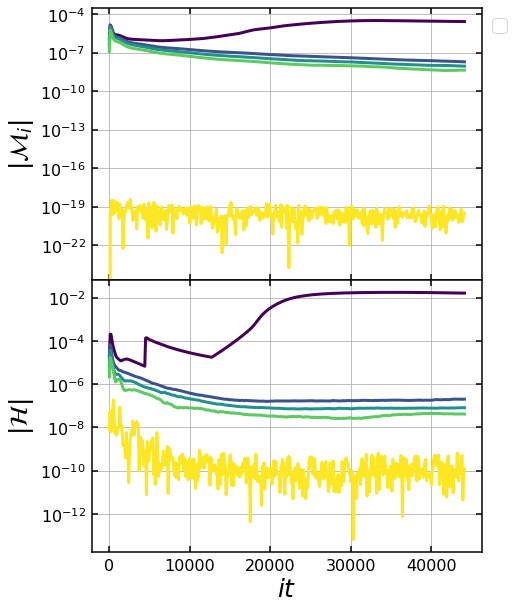

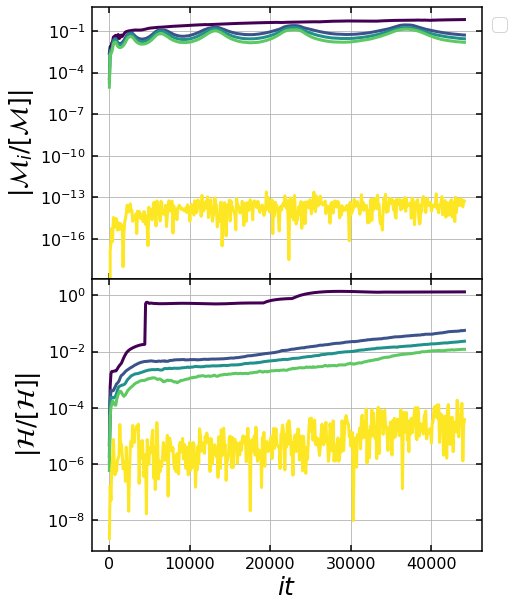

In [7]:
RRead.plot_constraints(fc_mKP)
RRead.plot_constraintsEScale(fc_mKP)

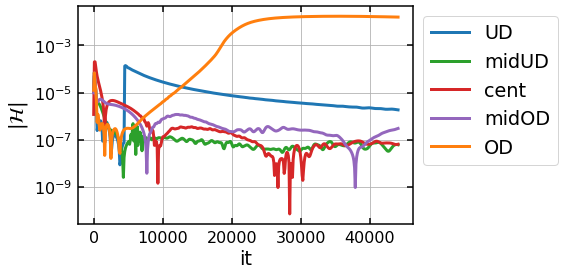

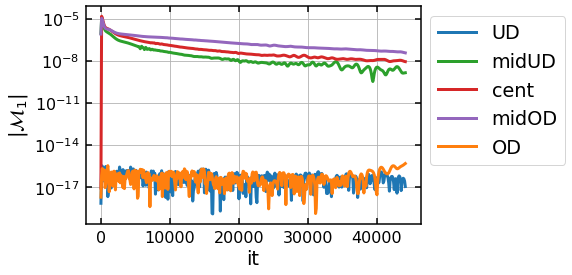

In [10]:
fdata = fc_mKP
temp = 'it'
var = 'Ham'
plt.figure()
plt.semilogy(fdata[temp], abs(fdata[var+'_UD']), color='C0', label='UD')
plt.semilogy(fdata[temp], abs(fdata[var+'_midUD']), color='C2', label='midUD')
plt.semilogy(fdata[temp], abs(fdata[var+'_cent']), color='C3', label='cent')
plt.semilogy(fdata[temp], abs(fdata[var+'_midOD']), color='C4', label='midOD')
plt.semilogy(fdata[temp], abs(fdata[var+'_OD']), color='C1', label='OD')
#plt.semilogy(fdata[temp], abs(fdata[var+'_F']), color='C5', label='F')
plt.grid()
plt.ylabel(r'$|\mathcal{H}|$')
plt.xlabel('it')
plt.legend(bbox_to_anchor=(1,1))

var = 'Mom1'
plt.figure()
plt.semilogy(fdata[temp], abs(fdata[var+'_UD']), color='C0', label='UD')
plt.semilogy(fdata[temp], abs(fdata[var+'_midUD']), color='C2', label='midUD')
plt.semilogy(fdata[temp], abs(fdata[var+'_cent']), color='C3', label='cent')
plt.semilogy(fdata[temp], abs(fdata[var+'_midOD']), color='C4', label='midOD')
plt.semilogy(fdata[temp], abs(fdata[var+'_OD']), color='C1', label='OD')
#plt.semilogy(fdata[temp], abs(fdata[var+'_F']), color='C5', label='F')
plt.grid()
plt.ylabel(r'$|\mathcal{M}_1|$')
plt.xlabel('it')
plt.legend(bbox_to_anchor=(1,1))
#plt.ylim(1e-7, 1e0)

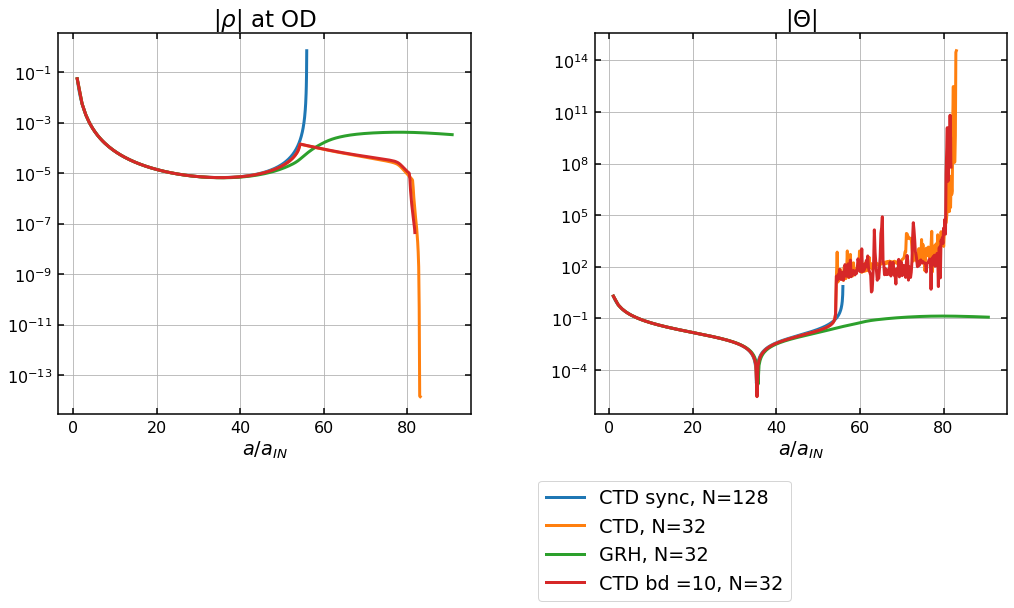

In [6]:
plt.figure(figsize=(17, 7))
loc = 'OD'
alphafac = 0.2

temporal = 'an_'

def plot_old(varname):
    plt.semilogy(Lin.an_initial(fA['t']), abs(fA[varname+loc]), label=r'CTD sync, N=128')

def plot_new(varname):
    varstr = varname+loc
    plt.semilogy(f_mK[temporal+loc], abs(f_mK[varstr]), label=r'CTD, N=32')
    plt.semilogy(f_mKP[temporal+loc], abs(f_mKP[varstr]), label=r'GRH, N=32')
    plt.semilogy(f_mK10[temporal+loc], abs(f_mK10[varstr]), label=r'CTD bd =10, N=32')

ax1 = plt.subplot(121)
plot_old('rho_')
plot_new('rho_u_')
plt.grid()
plt.title(r'$|\rho|$'+' at '+loc)
plt.xlabel(r'$a/a_{IN}$')

ax2 = plt.subplot(122)
plot_old('K_')
plot_new('Theta_')
plt.grid()
plt.title(r'$|\Theta|$')
plt.xlabel(r'$a/a_{IN}$')
plt.legend(bbox_to_anchor=(0.5,-0.15))

plt.subplots_adjust(wspace = 0.3)

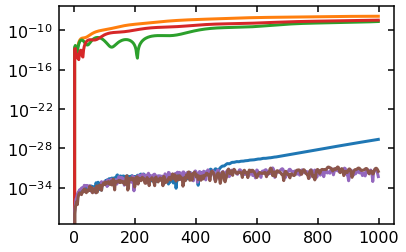

In [20]:
for loc in ['OD', 'midOD', 'cent', 'midUD', 'UD', 'F']:
    plt.semilogy(f_mKP['t'], abs(f_mKP['betasquare_'+loc]), label=r'GRH cosmo puncture, N=32')